## A Linear Regression example with numpy

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Generate dummy data

(43.50226674759192, 139.53703474745808)

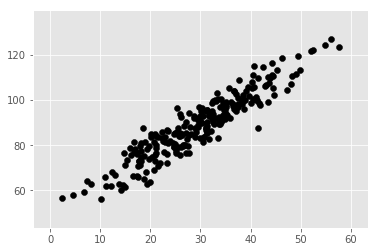

In [2]:
theta_real_0 = 50
theta_real_1 = 1.3

xs = np.random.normal(30.0,10.0,250)
ys = theta_real_0 + xs * theta_real_1 + np.random.normal(0, 5.0, 250)

plt.scatter(xs, ys, color='k')

margin = 0.1
x_min = np.min(xs) - np.abs(np.max(xs)*margin)
x_max = np.max(xs) + np.abs(np.max(xs)*margin)
y_min = np.min(ys) - np.abs(np.max(ys)*margin)
y_max = np.max(ys) + np.abs(np.max(ys)*margin)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

That is the spread that we will try to aproximate with our line.

### Write the cost function

In [3]:
def cost(theta_0, theta_1, xs, ys):
    m = len(xs)
    
    hs = theta_0 + theta_1 * xs
    errors = hs - ys
    
    errors_squared = errors ** 2
    return errors_squared.sum() / m

### Gradient descent

Remember, we have to descend in the direction of the steepest gradient. For that, we need to now what direction the gradient points!

### Partial differentials of the cost function

$$\frac{\partial}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

In [4]:
def partial_theta_0(theta_0, theta_1, xs, ys):
    m = len(xs)
    hs = theta_0 + theta_1 * xs

    errors = hs - ys
    return errors.sum() / m


def partial_theta_1(theta_0, theta_1, xs, ys):
    m = len(xs)

    hs = theta_0 + theta_1 * xs
    errors = hs - ys

    return (errors * xs).sum() / m


### Implementing gradient descent

Now we are ready to implement the actual gradient descent. Remember, the algorithm is:

- Initialize variables

- Compute cost function

- Compute gradients

- Update variables: gradient times learning rate (alpha)

- Repeat until convergence: cost at iteration n-1 $\sim$ cost at iteration n

In [5]:
def linear_regression(initial_theta_0, initial_theta_1, alpha, cost_change_limit, xs, ys):
    theta_0 = initial_theta_0
    theta_1 = initial_theta_1
    
    cost_history = [cost(theta_0,theta_1,xs,ys)]
    theta_0_history = [theta_0]
    theta_1_history = [theta_1]

    round=0
    while True:

        #print("Ronda {}".format(round))
        d_theta_0 = partial_theta_0(theta_0,theta_1,xs,ys)
        d_theta_1 = partial_theta_1(theta_0,theta_1,xs,ys)

        theta_0_increment = - d_theta_0 * alpha
        theta_1_increment = - d_theta_1 * alpha

        theta_0 += theta_0_increment
        theta_1 += theta_1_increment

        current_cost = cost(theta_0,theta_1,xs,ys)
        cost_history.append(current_cost)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        round+=1
        
        if np.abs(cost_history[-1] - cost_history[-2]) <= cost_change_limit:
            break
            
        if current_cost  >  cost_history[0] and round>5: 
            break
        #print("Cost: \t\t {:.3f}".format(current_cost))
        #print("New theta0: \t {:.3f} \t\t New theta1: \t {:.3f}".format(theta_0, theta_1))
        #print("\n")
    
    return alpha, theta_0, theta_1, cost_history, theta_0_history, theta_1_history

Exploring different alphas: 

In [6]:
initial_theta_0 = np.random.randint(-100,100)
initial_theta_1 = np.random.randint(-100,100)
alphas = [0.0001, 0.0005, 0.001]
cost_change_limit = 0.00001

In [7]:
results = []

for alpha in alphas:
    results.append(linear_regression(initial_theta_0, initial_theta_1, alpha, cost_change_limit, xs, ys))
    

(43.50226674759192, 139.53703474745808)

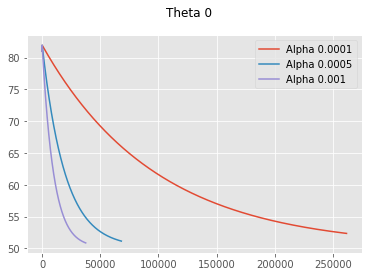

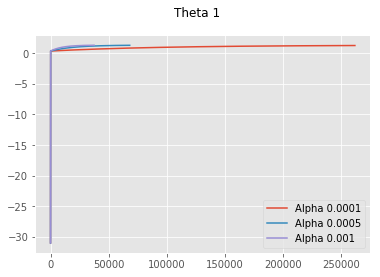

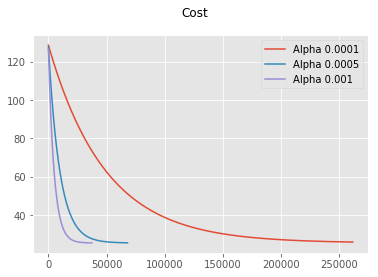

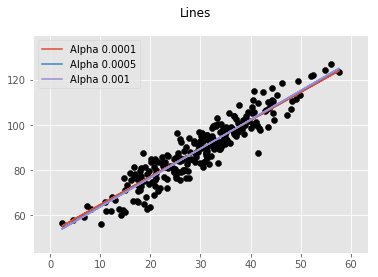

In [8]:
for result in results:
    alpha, theta_0, theta_1, cost_history, theta_0_history, theta_1_history = result
    plt.figure(1)
    plt.plot(theta_0_history, label="Alpha {}".format(alpha))
    plt.legend()
    plt.figure(2)
    plt.plot(theta_1_history, label="Alpha {}".format(alpha))
    plt.legend()
    plt.figure(3)
    plt.plot(cost_history[100:], label="Alpha {}".format(alpha))
    plt.legend()
    
    hs = theta_0 + theta_1 * xs
    plt.figure(4)
    plt.plot(xs,hs, label="Alpha {}".format(alpha))
    plt.legend()


f1 = plt.figure(1)
f1.suptitle("Theta 0")

f2 = plt.figure(2)
f2.suptitle("Theta 1")

f3 = plt.figure(3)
f3.suptitle("Cost")

f4 = plt.figure(4)
f4.suptitle("Lines")
plt.figure(4)
plt.scatter(xs, ys,color="k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

These are some of the functions tried for last alpha in alphas array: 

(43.50226674759192, 139.53703474745808)

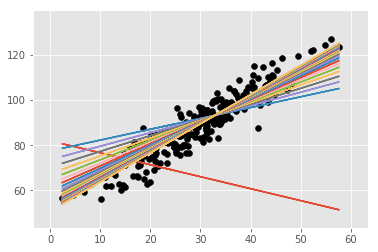

In [9]:
plt.scatter(xs, ys,color="k")
number_of_lines = 25
for i in range(1, len(theta_0_history), len(theta_0_history)//number_of_lines):
    hs = theta_0_history[i] + theta_1_history[i] * xs
    plt.plot(xs,hs)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)